In [10]:
import streamlit as st
import datetime as dt
import altair as alt
import pandas as pd
import requests
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, VerticalPitch ,add_image
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from urllib.request import urlopen
from PIL import Image

In [ ]:
positions = {
            'GKP': pitch_length + 1 * zone_height,
            'DEF': pitch_length + 2 * zone_height - space_between_zones,
            'MID': pitch_length + 3 * zone_height - space_between_zones * 2,
            'FWD': pitch_length + 4 * zone_height - space_between_zones * 3
        }

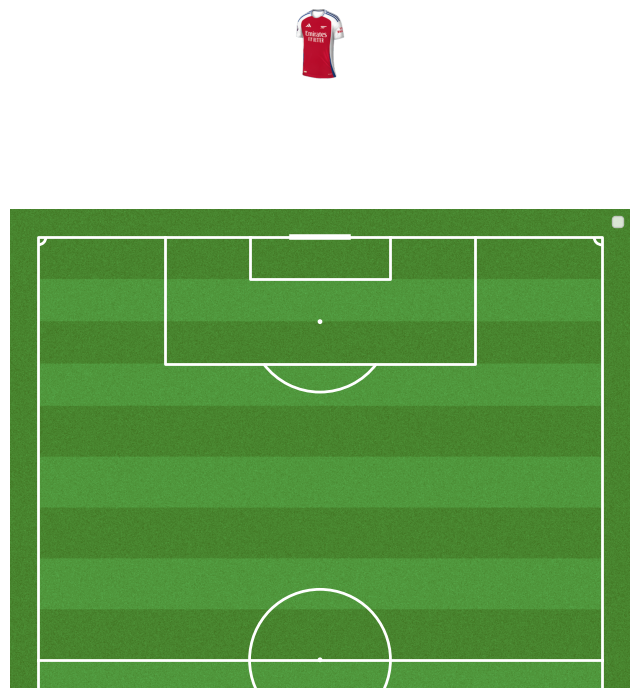

In [209]:
from matplotlib import pyplot as plt
from mplsoccer import VerticalPitch
import matplotlib.patches as patches

# Define the figure size
fig_size = (8, 8)  # Set to desired size (width, height)

# Create a vertical pitch with specified size
pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True, corner_arcs=True, half=True)
fig, ax = pitch.draw(figsize=fig_size, tight_layout=False)  # Draw the pitch

# Extract pitch dimensions from the figure
pitch_length = fig.get_figheight() * 10  # Scale as needed (10 is a scaling factor)
pitch_width = fig.get_figwidth() * 10  # Scale as needed

num_zones = 4  # Number of zones
zone_height = pitch_length / (num_zones + 2)  # Common height for all zones
space_between_zones = 2  # Space between zones

# Define placements for each zone
gkp_y_position = pitch_length + 2 * zone_height
def_y_position = pitch_length + zone_height - space_between_zones
mid_y_position = pitch_length - 1/zone_height  - space_between_zones * 2
fwd_y_position = pitch_length - zone_height - space_between_zones * 3

# Add legend for reference lines
ax.legend()
# Centering image in the GKP zone
IMAGE_URL = 'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_3-110.png'
image = Image.open(urlopen(IMAGE_URL))
x = 0
y = fwd_y_position 

# Calculate the center of the rectangle
center_x = x + (pitch_width / 2)
center_y = y + (zone_height / 2)
x_image = pitch_width / 2 # Centered horizontally in the GKP zone
y_image = pitch_length + 2 * zone_height  # Centered vertically in the GKP zone

ax_image = pitch.inset_image(center_y, center_x, image, height=10, ax=ax)
plt.show()


In [208]:
from matplotlib import pyplot as plt
from mplsoccer import VerticalPitch
import matplotlib.patches as patches
from PIL import Image
from urllib.request import urlopen
import pandas as pd

# Sample DataFrame
data = {
    'Player': ['Arrizabalaga', 'Saliba', 'Ajer', 'Hall', 'Semenyo', 'Gordon', 
               'M.Salah (VC)', 'Rogers', 'Wood', 'Solanke', 'Haaland (C)', 
               'Pickford', 'Mitoma', 'Digne', 'Mazraoui'],
    'Pos': ['GKP', 'DEF', 'DEF', 'DEF', 'MID', 'MID', 'MID', 'MID', 'FWD', 'FWD', 
            'FWD', 'GKP', 'MID', 'DEF', 'DEF'],
    'Team': ['BOU', 'ARS', 'BRE', 'NEW', 'BOU', 'NEW', 
             'LIV', 'AVL', 'NFO', 'TOT', 'MCI', 
             'EVE', 'BHA', 'AVL', 'MUN'],
    'vs': ['LEI', 'SOU', 'WOL', 'EVE', 'LEI', 'EVE', 
           'CRY', 'MUN', 'CHE', 'BHA', 'FUL', 
           'NEW', 'TOT', 'MUN', 'AVL'],
    'GWP': [2, 2, 0, 5, 2, 1, 
            3, 3, 8, 5, 4, 
            15, 5, 8, 1],
    'Played': [True] * 11 + [False] * 3,
    'code': ['https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_3-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_1-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_4-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_15-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_3-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_15-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_12-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_2-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_16-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_18-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_13-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_8-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_5-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_2-110.png',
             'https://fantasy.premierleague.com/dist/img/shirts/standard/shirt_14-110.png']
}

df = pd.DataFrame(data)

# Define the figure size
fig_size = (8, 8)  # Set to desired size (width, height)

# Create a vertical pitch with specified size
pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True, corner_arcs=True, half=True)
fig, ax = pitch.draw(figsize=fig_size, tight_layout=False)  # Draw the pitch

# Extract pitch dimensions from the figure
pitch_length = fig.get_figheight() * 10  # Scale as needed (10 is a scaling factor)
pitch_width = fig.get_figwidth() * 10  # Scale as needed

# Define placements for each position zone
zone_height = pitch_length / 6  # Height for each zone
space_between_zones = 1  # Space between zones

# Position calculations
positions = {
    'GKP': pitch_length + 1 * zone_height,
    'DEF': pitch_length + 2 * zone_height - space_between_zones,
    'MID': pitch_length + 3 * zone_height - space_between_zones * 2,
    'FWD': pitch_length + 4 * zone_height - space_between_zones * 3
}

# Loop through DataFrame and place images
for index, row in df.iterrows():
    IMAGE_URL = row['code']
    image = Image.open(urlopen(IMAGE_URL))

    pos = row['Pos']
    if pos == 'GKP':
        y_image = positions['GKP']
        x_image = pitch_width / 2  # Centered horizontally
    elif pos == 'DEF':
        y_image = positions['DEF']
        x_image = pitch_width / (len(df[df['Pos'] == 'DEF']) + 1) * (index % 5 + 1)  # Distribute DEF
    elif pos == 'MID':
        y_image = positions['MID']
        x_image = pitch_width / (len(df[df['Pos'] == 'MID']) + 1) * (index % 5 + 1)  # Distribute MID
    elif pos == 'FWD':
        y_image = positions['FWD']
        x_image = pitch_width / (len(df[df['Pos'] == 'FWD']) + 1) * (index % 3 + 1)  # Distribute FWD

    # Draw the image on the pitch
    ax_image = pitch.inset_image(y_image, x_image, image, height=10, ax=ax)

# Show the pitch with player images
plt.show()


ValueError: All arrays must be of the same length

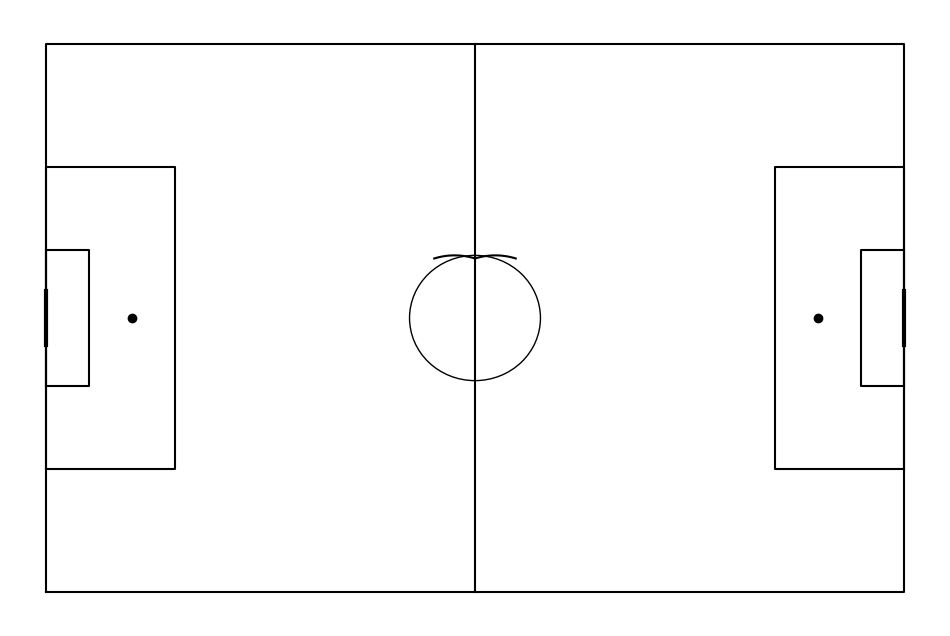

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define pitch dimensions (in yards)
length = 120
width = 80

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Pitch outline and center line
plt.plot([0, 0, length, length, 0], [0, width, width, 0, 0], color='black')
plt.plot([length/2, length/2], [0, width], color='black')

# Center circle
center_circle = plt.Circle((length/2, width/2), 9.15, color='black', fill=False)
ax.add_patch(center_circle)

# Penalty areas
penalty_box_width = 44
penalty_box_length = 18
plt.plot([0, penalty_box_length, penalty_box_length, 0, 0], 
         [(width-penalty_box_width)/2, (width-penalty_box_width)/2, (width+penalty_box_width)/2, (width+penalty_box_width)/2, (width-penalty_box_width)/2], 
         color='black')
plt.plot([length, length - penalty_box_length, length - penalty_box_length, length, length], 
         [(width-penalty_box_width)/2, (width-penalty_box_width)/2, (width+penalty_box_width)/2, (width+penalty_box_width)/2, (width-penalty_box_width)/2], 
         color='black')

# Penalty spots
plt.plot(12, width/2, 'o', color='black')
plt.plot(length - 12, width/2, 'o', color='black')

# Goal areas
goal_box_width = 20
goal_box_length = 6
plt.plot([0, goal_box_length, goal_box_length, 0, 0], 
         [(width-goal_box_width)/2, (width-goal_box_width)/2, (width+goal_box_width)/2, (width+goal_box_width)/2, (width-goal_box_width)/2], 
         color='black')
plt.plot([length, length - goal_box_length, length - goal_box_length, length, length], 
         [(width-goal_box_width)/2, (width-goal_box_width)/2, (width+goal_box_width)/2, (width+goal_box_width)/2, (width-goal_box_width)/2], 
         color='black')

# Arcs
center_x = length / 2
penalty_spot_distance = 12
arc_radius = 9.15

for x_sign in [-1, 1]:
    arc_x = center_x + x_sign * (penalty_spot_distance - arc_radius)
    arc_angles = np.linspace(np.arccos((penalty_spot_distance - arc_radius) / arc_radius),
                             np.pi - np.arccos((penalty_spot_distance - arc_radius) / arc_radius), 
                             50)
    arc_x_coords = arc_x + arc_radius * np.cos(arc_angles)
    arc_y_coords = width / 2 + arc_radius * np.sin(arc_angles)
    plt.plot(arc_x_coords, arc_y_coords, color='black')

# Goals
goal_width = 8
plt.plot([0, 0], [(width - goal_width)/2, (width + goal_width)/2], color='black', linewidth=3)
plt.plot([length, length], [(width - goal_width)/2, (width + goal_width)/2], color='black', linewidth=3)

# Customize plot
plt.xlim([-5, length + 5])
plt.ylim([-5, width + 5])
plt.axis('off')

# Sample player positions (replace with your data)
player_positions = np.array([[20, 40], [60, 30], [80, 50]])

# Plot players
player_points, = plt.plot(player_positions[:, 0], player_positions[:, 1], 'ro', markersize=10)

def onclick(event):
    """Highlights the closest player to the mouse click."""
    click_x, click_y = event.xdata, event.ydata
    distances = np.sqrt((player_positions[:, 0] - click_x)**2 + (player_positions[:, 1] - click_y)**2)
    closest_player = np.argmin(distances)
    
    # Update player colors, highlighting the closest
    colors = ['r'] * len(player_positions)
    colors[closest_player] = 'b'
    player_points.set_color(colors)
    fig.canvas.draw_idle()

fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()